### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS

In [4]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Hitters.csv"
Hitters = pd.read_csv(url)

In [5]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [6]:
# clean data
print(Hitters.shape)
Hitters = Hitters.dropna()

(322, 21)


In [7]:
Hitters.shape

(263, 21)

In [8]:
Hitters.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [9]:
# converting categorical data into dummy variable
Hitters_1 = pd.get_dummies(Hitters, drop_first=True, columns=['League', 'Division', 'NewLeague'])

In [10]:
Hitters_1.head()

,Names,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,632,43,10,475.0,1,1,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,880,82,14,480.0,0,1,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,200,11,3,500.0,1,0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,805,40,4,91.5,1,0,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,282,421,25,750.0,0,1,0


In [18]:
# best subset selection
X = Hitters_1.drop(columns = ['Salary', 'Names'])
y = Hitters_1.Salary

In [23]:
lm = LinearRegression()
efs = EFS(lm, min_features=1, max_features=8, scoring='r2', cv=10).fit(X,y)

Features: 169741/169765

In [25]:
features = efs.best_feature_names_
features

('AtBat', 'Hits', 'Walks', 'CAtBat', 'CRuns', 'CRBI', 'PutOuts', 'Division_W')

In [26]:
idx = efs.best_idx_
idx

(0, 1, 5, 7, 10, 11, 13, 17)

In [32]:
feat_list = pd.concat([pd.DataFrame([features]).T, pd.DataFrame([idx]).T], axis = 1)
feat_list.columns = ['Features', 'Index']
avg_score = pd.DataFrame()
for i in idx:
    avg_score = avg_score.append(pd.DataFrame([efs.subsets_[i]['avg_score']]))
avg_score.columns = ['Average Score']
avg_score.reset_index(drop=True,inplace=True)
feat_list = pd.concat([feat_list, avg_score], axis=1, ignore_index=True)
feat_list.columns = ['Features', 'Index', 'Average Score']
feat_list

,Features,Index,Average Score
0,AtBat,0,0.085051
1,Hits,1,0.114179
2,Walks,5,0.139711
3,CAtBat,7,0.234002
4,CRuns,10,0.272588
5,CRBI,11,0.261764
6,PutOuts,13,-0.024187
7,Division_W,17,-0.047418


In [37]:
X_reg = X[feat_list['Features']]

In [39]:
X_reg.head()

,AtBat,Hits,Walks,CAtBat,CRuns,CRBI,PutOuts,Division_W
1,315,81,39,3449,321,414,632,1
2,479,130,76,1624,224,266,880,1
3,496,141,37,5628,828,838,200,0
4,321,87,30,396,48,46,805,0
5,594,169,35,4408,501,336,282,1


In [40]:
lm_best = LinearRegression().fit(X_reg, y)

In [77]:
final_coefs = pd.DataFrame(lm_best.coef_)
final_coefs = pd.concat([feat_list['Features'], final_coefs], axis = 1)
final_intercept = pd.DataFrame([lm_best.intercept_]*8)
final_coefs = pd.concat([final_coefs, final_intercept], axis = 1)
final_coefs.columns = ['Features', 'Coefficients', 'Intercept']
final_coefs

,Features,Coefficients,Intercept
0,AtBat,-1.749469,118.235253
1,Hits,7.268237,118.235253
2,Walks,2.709401,118.235253
3,CAtBat,-0.108637,118.235253
4,CRuns,0.810856,118.235253
5,CRBI,0.606283,118.235253
6,PutOuts,0.277954,118.235253
7,Division_W,-111.070298,118.235253


In [138]:
Xj = pd.DataFrame()
for i in final_coefs['Features']:
    Xj = pd.concat([Xj, X[i]], axis = 1)
    print(Xj)

     AtBat
1      315
2      479
3      496
4      321
5      594
6      185
7      298
8      323
9      401
10     574
11     202
12     418
13     239
14     196
16     568
17     190
19     127
20     413
21     426
23     472
24     629
25     587
26     324
27     474
28     550
29     513
31     419
33     583
34     204
35     379
..     ...
287    687
288    368
289    263
290    642
291    265
293    559
294    520
295     19
296    205
297    193
299    213
300    510
301    578
303    441
304    172
306    127
307    279
308    480
309    600
310    610
311    360
312    387
313    580
314    408
315    593
317    497
318    492
319    475
320    573
321    631

[263 rows x 1 columns]
     AtBat  Hits
1      315    81
2      479   130
3      496   141
4      321    87
5      594   169
6      185    37
7      298    73
8      323    81
9      401    92
10     574   159
11     202    53
12     418   113
13     239    60
14     196    43
16     568   158
17     190    46
19   

In [142]:
Xj = pd.DataFrame()
r2iPlot = pd.DataFrame()
for i in final_coefs['Features']:
    Xj = pd.concat([Xj, X[[i]]], axis = 1)
    lmi = LinearRegression().fit(Xj, y)
    lmpred = lmi.predict(Xj)
    r2i = r2(y, lmpred)
    r2iPlot = r2iPlot.append(pd.DataFrame([r2i]))
r2iPlot.columns = ['R2']
r2iPlot.reset_index(inplace=True, drop=True)
r2iPlot.index = r2iPlot.index + 1
r2iPlot

,R2
1,0.155844
2,0.203592
3,0.275810
4,0.440365
5,0.455535
6,0.477372
7,0.503854
8,0.518528


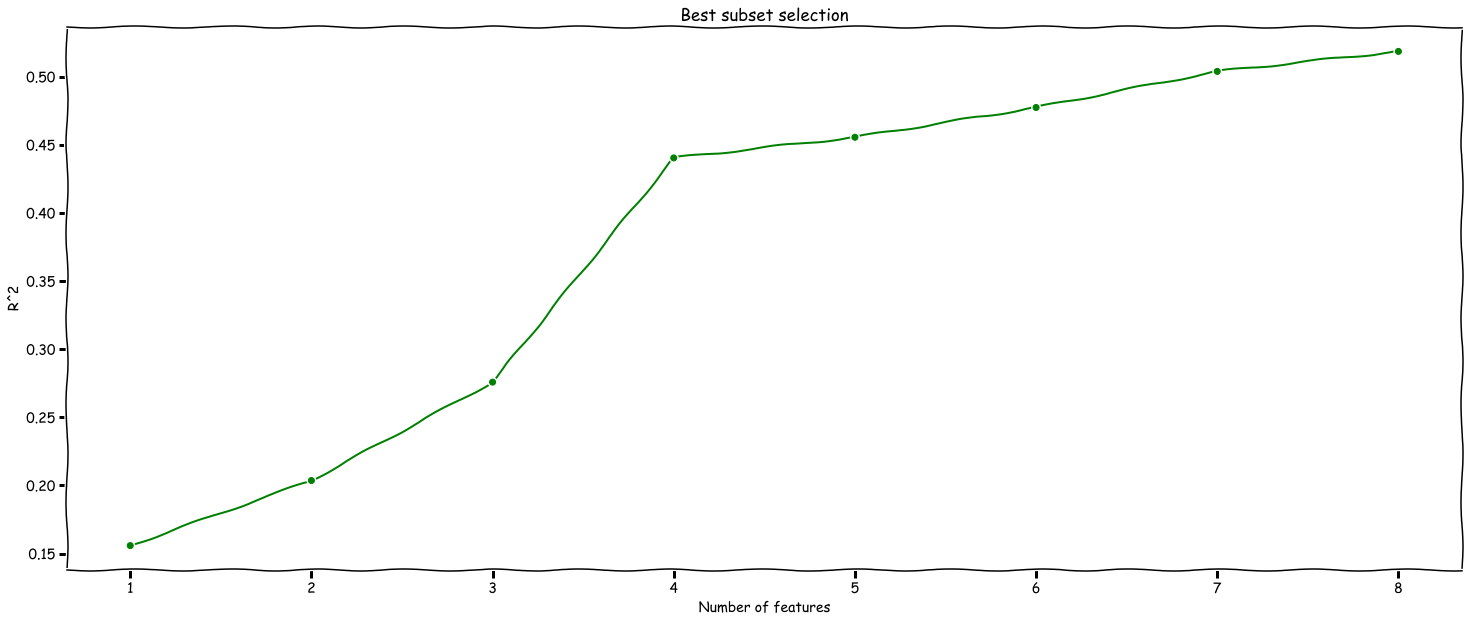

In [151]:
plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(r2iPlot, marker='o', color='green')
plt.title('Best subset selection')
plt.ylabel('R^2')
plt.xlabel('Number of features')
plt.grid()

**As we can see the model gets its higest $R^2$ when the number of features n=8.**